In [162]:
import sklearn
from sklearn import cluster
import numpy as np
from copy import deepcopy
from sklearn.cluster import KMeans

In [163]:
with open('rule_3.txt', 'r') as f:
    r3 = f.read()
    
sents = [a.strip() for a in r3.split('\n- ')]
sents = sents[1:]
print(sents)

['for detecting the presence of, or exposure to, a sexually transmitted agent;', 'for  detecting  the  presence  in  cerebrospinal  fluid  or  blood  of  an  infectious agent  without  a  high  or  suspected high risk of propagation;', "for  detecting  the  presence  of  an  infectious  agent,  if  there  is  a  significant risk  that  an  erroneous  result  would cause  death  or  severe  disability  to  the individual,  foetus  or  embryo  being  tested,  or  to  the  individual's offspring;", 'for pre-natal screening of women in order  to determine their  immune status towards transmissible agents;', "for  determining  infective  disease  status  or  immune  status,  where  there  is  a risk  that  an  erroneous  result would lead to a patient management decision resulting in a life-threatening situation for  the patient or for  the patient's offspring;", 'to be used as companion diagnostics;', "to  be  used  for  disease  staging,  where  there  is  a  risk  that  an  erroneous res

In [164]:
import spacy
nlp = spacy.load('en_core_web_sm')

rules = [nlp(sent) for sent in sents]

array = np.array([sent.vector for sent in rules])
array.shape

(13, 96)

In [165]:
kmeansAlgo = sklearn.cluster.KMeans(n_clusters=4) # initalise KMeans

kmeansAlgo.fit(array) # fitting the KMeans algorithm

# Predicting labels with KMeans clustering
labels = kmeansAlgo.predict(array); labels

array([0, 1, 1, 0, 1, 2, 1, 0, 3, 1, 0, 0, 1], dtype=int32)

In [166]:
centers = kmeansAlgo.cluster_centers_

In [167]:
centers.shape

(4, 96)

In [168]:
import pandas as pd

In [169]:
pd.DataFrame({'sentences': sents, 'cluster number': labels})

,sentences,cluster number
0,"for detecting the presence of, or exposure to,...",0
1,for detecting the presence in cerebrospin...,1
2,for detecting the presence of an infecti...,1
3,for pre-natal screening of women in order to ...,0
4,for determining infective disease status ...,1
5,to be used as companion diagnostics;,2
6,"to be used for disease staging, where t...",1
7,"to be used in screening, diagnosis, or staging...",0
8,for human genetic testing;,3
9,for monitoring of levels of medicinal pr...,1


In [170]:
kmeansAlgo.cluster_centers_.shape

(4, 96)

In [171]:
# performing a principal component analysis to reduce the number of dimensions 

pca = sklearn.decomposition.PCA()
result = pca.fit_transform(array)

In [172]:
projected_centers = pca.transform(centers)

In [173]:
projected_centers[:, :2].shape

(4, 2)

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [175]:
cdict = {0: 'green', 1: 'red', 2: 'orange', 3: 'blue', 4: 'purple', 5: 'turquoise'}
label_names = {0: 'cluster 1', 1: 'cluster 2', 2: 'cluster 3', 3: 'cluster 4', 4: 'cluster 5', 5: 'cluster 6'}

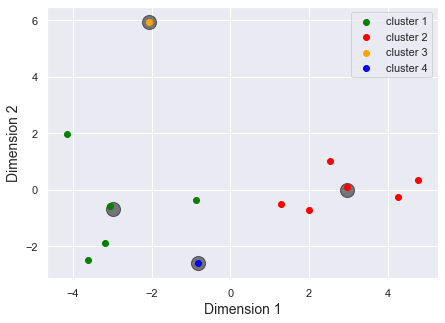

In [176]:
fig,ax = plt.subplots(figsize = (7,5))
plt.scatter(projected_centers[:, 0], projected_centers[:, 1], c='black', s=200, alpha=0.5)

for l in np.unique(labels):
    idx = np.where(labels==l)
    ax.scatter(result[idx, 0], result[idx, 1],
              c=cdict[l], label=label_names[l])
    
plt.xlabel("Dimension 1",fontsize=14)
plt.ylabel("Dimension 2",fontsize=14)
plt.legend()
plt.show()

#pca; first component is a weighted linear combination of the 96 dimensions 
#second is also weighted....
#when you project vectors onto this 2D space, you lose information which is why we have an unexpected cluster centre 

#the clusters have been calcualted in 96 dimensions so when you do the pca you don't preserve 

In [177]:
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(array)
# Getting the cluster labels
labels = kmeans.predict(array)
# Centroid values
centroids = kmeans.cluster_centers_